0
1


/Users/jiaer/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2


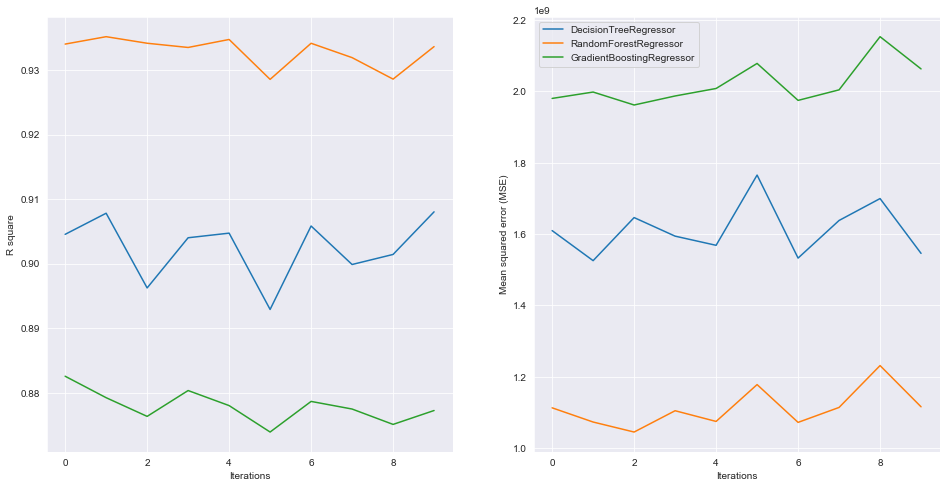

In [12]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# reading dataset
df = pd.read_csv("edited_resale_flat_prices.csv").dropna()
df = df.sample(frac = 0.1)
df.head()

# encoding all the columns that are categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['town'] = le.fit_transform(df['town'])
df['flat_type'] = le.fit_transform(df['flat_type'])
df['storey_range'] = le.fit_transform(df['storey_range'])
df['flat_model'] = le.fit_transform(df['flat_model'])

# selecting the significant variables 
x = df[['town', 'storey_range', 'flat_type', 'flat_model', 'floor_area_sqm', 'lease_commence_date', 'age']]
y = df['real_price']

# comparison 
models = [DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]
score_list = [[],[],[]]
mse_list = [[],[],[]]

# training model for 10 times
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
    
    for m in range(3):
        model = models[m]
        model.fit(x_train, y_train)
        prediction = model.predict(x_test)

        score_list[m].append(model.score(x_test, y_test))
        mse_list[m].append(mean_squared_error(prediction, y_test))

# plotting r-square and MSE graphs to visualise the difference
fig, ax = plt.subplots(1,2, figsize = (16,8))
sns.set_style("darkgrid")

labels = ['DecisionTreeRegressor', 'RandomForestRegressor','GradientBoostingRegressor']

for m in range(3):
    ax[0].plot([i for i in range(10)], score_list[m], label = labels[m])
    ax[1].plot([i for i in range(10)], mse_list[m], label = labels[m])

ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("R square")

ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Mean squared error (MSE)")

plt.legend()
plt.show()

Since Random Forest Regressor has the highest R-squared and lowest MSE, which means the data is the closest to the fitted regression line and has the least error amongst all the models.